# TSLA Sock Market prediction using LSTM

Dans ce travail, nous examinons l’efficacité d’un algorithme deep learning pour la prévision du marché boursier. LSTM Le principal problème du projet est de prédire avec précision la valeur d’ouverture/fermeture d’un certain stock sur une période donnée. Comparer le rendement du modèle et recommander le meilleur modèle pour le marché boursier prévu. L’objectif principal de ce travail de comparaison des différents modèles d’apprentissage automatique sur les données de cours des actions TSLA. Le cours de l’action de TSLA a augmenté au cours des trois dernières années. Avant 2018, les données boursières montrent un comportement presque aplati, sur la base de ces données historiques, il est difficile pour un modèle d’apprendre et de prédire la valeur future des actions de TSLS. Dans la figure 1, nous pouvons voir que tous les attributs du cours de l’action des données de l’indice TSLA ont été relevés en 2020 et en 2021, même pendant ces années où le monde était confronté à la pandémie de COVID-19. Nous sommes donc intéressés à former un modèle pour prévoir le prix proche des actions TSLA.

In [1]:
# Importing Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/TSLA.csv')

In [3]:
# show the first lines
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-23,2.084000,2.165333,1.994667,2.006000,2.006000,23289000
1,2010-12-27,1.868000,1.905333,1.670667,1.703333,1.703333,139528500
2,2010-12-28,1.723333,1.783333,1.666667,1.760667,1.760667,60844500
3,2010-12-29,1.802000,1.867333,1.766667,1.848667,1.848667,49788000
4,2010-12-30,1.846667,1.860000,1.758667,1.766667,1.766667,30616500


In [4]:
# Convert the Date column to DateTime object
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# Decompose the time series year-wise and month-wise to analyse further
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['WeekDay'] = data['Date'].dt.weekday

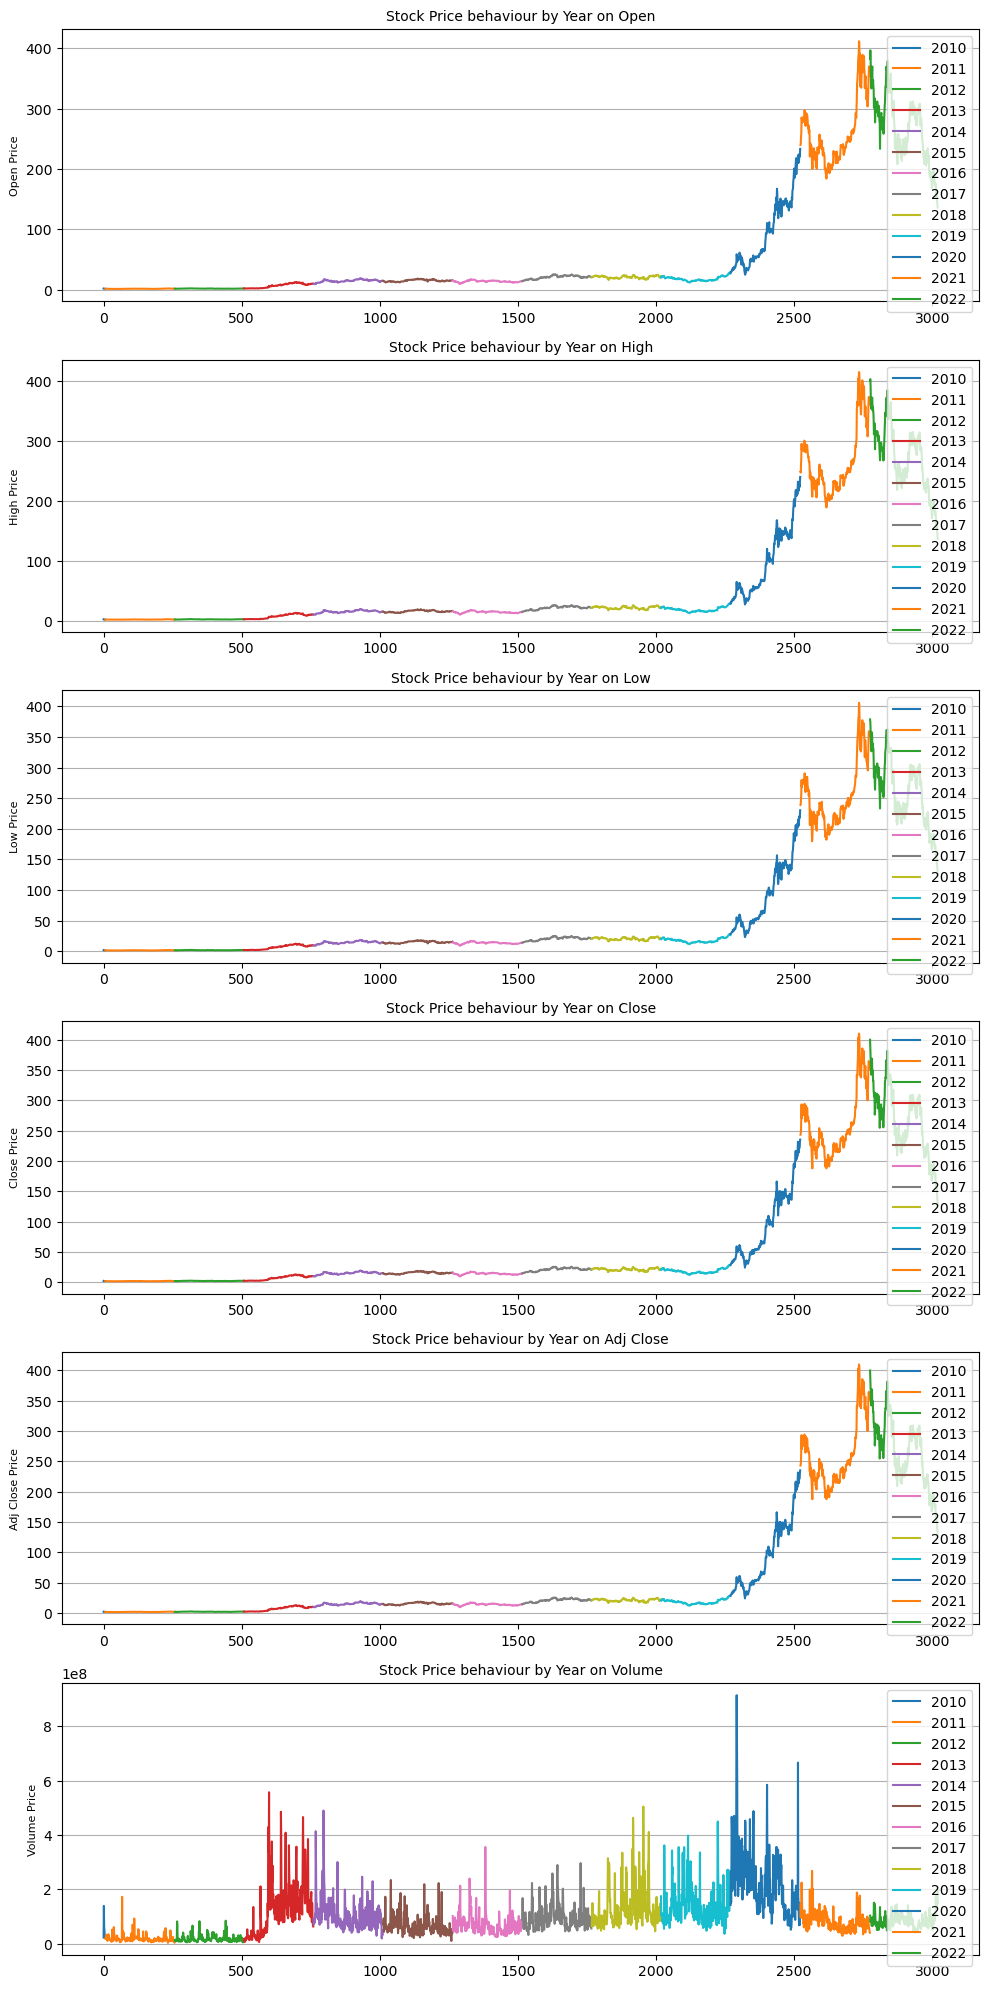

In [6]:
# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
Column = ['Open', 'High', 'Low','Close','Adj Close', 'Volume']
fig, ax = plt.subplots(len(Column), figsize = (10, 20))

# Group the data by year and plot
for i, col_list in enumerate(Column):
    data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price behaviour by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

In [7]:
# Selecting Features
feature = data[['Open', 'High', 'Low', 'Close', 'Volume']]

We are going to use multivariate timeseries forecasting. where we used all the columns including target variable as a feature variable (input variables).

In [8]:
# Standardization
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(feature)

In [9]:
# Select target variable, in this project we are going to choosing 'close' price of each day as target varable.
target = df_scaled[:,3]

In [10]:
# Splitting dataset
x_train = df_scaled[0:2700]
x_test = df_scaled[2700:,:]
y_train = target[0:2700]
y_test = target[2700:]

In [12]:
# Generate timeseries on the basis of past 60 days
n_past = 60
batch_size = 20
num_feature = 5
train_generator = TimeseriesGenerator(x_train, y_train, length= n_past, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator (x_test, y_test, length = n_past, sampling_rate=1, batch_size=batch_size)

### LSTM model

In [13]:
model = Sequential()
model.add(LSTM(500, activation = 'tanh' , input_shape=(n_past, num_feature), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(400,  return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200,  return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 500)           1012000   
                                                                 
 dropout (Dropout)           (None, 60, 500)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 400)           1441600   
                                                                 
 dropout_1 (Dropout)         (None, 60, 400)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 200)           480800    
                                                                 
 dropout_2 (Dropout)         (None, 60, 200)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               1

In [14]:
history = model.fit(train_generator, epochs=10, validation_data= test_generator, shuffle=False,  batch_size=20,  verbose=1)

Epoch 1/10
132/132 [==============================] - 77s 533ms/step - loss: 0.0085 - val_loss: 0.0288
Epoch 2/10
132/132 [==============================] - 70s 530ms/step - loss: 0.0031 - val_loss: 0.0123
Epoch 3/10
132/132 [==============================] - 71s 539ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 4/10
132/132 [==============================] - 72s 546ms/step - loss: 0.0018 - val_loss: 0.0124
Epoch 5/10
132/132 [==============================] - 72s 543ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 6/10
132/132 [==============================] - 70s 531ms/step - loss: 0.0011 - val_loss: 0.0095
Epoch 7/10
132/132 [==============================] - 70s 531ms/step - loss: 0.0011 - val_loss: 0.0118
Epoch 8/10
132/132 [==============================] - 68s 518ms/step - loss: 0.0011 - val_loss: 0.0096
Epoch 9/10
132/132 [==============================] - 67s 511ms/step - loss: 7.3517e-04 - val_loss: 0.0070
Epoch 10/10
132/132 [==============================] - 67s 509ms/step

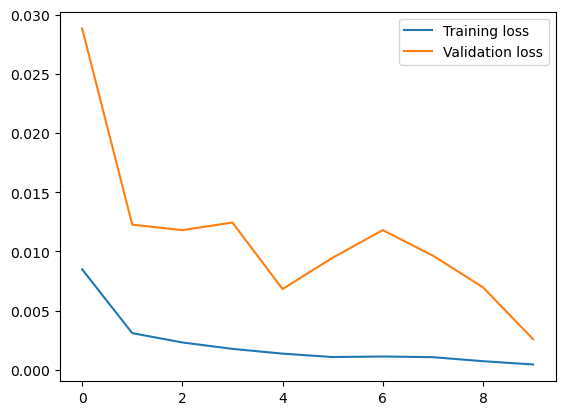

In [15]:
# plot the 'Training loss' & 'Validation loss'
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
#plt.rcParams["figure.figsize"] = (12.5,8.5)
plt.legend()

In [16]:
# predicting close value using lSTM model
predictions = model.predict(test_generator)

14/14 [==============================] - 3s 97ms/step


In [25]:
x_test

array([[0.60848872, 0.60890562, 0.612963  , 0.61411423, 0.04192938],
       [0.61200077, 0.61062468, 0.61493366, 0.61615412, 0.08898371],
       [0.59363572, 0.5952579 , 0.58905917, 0.59223006, 0.07762771],
       ...,
       [0.35266257, 0.35588635, 0.33704274, 0.3337571 , 0.17130297],
       [0.33629742, 0.33842921, 0.33266435, 0.33319409, 0.15576636],
       [0.32815145, 0.32721891, 0.29894838, 0.30328082, 0.22513927]])

In [27]:
pd.DataFrame(x_test[:,:4][n_past:])

,0,1,2,3
0,0.816545,0.820417,0.806667,0.826298
1,0.810317,0.807520,0.781015,0.784993
2,0.764718,0.776375,0.763353,0.778547
3,0.771392,0.786334,0.761910,0.792810
4,0.804960,0.799433,0.756633,0.752771
...,...,...,...,...
256,0.385807,0.386200,0.367667,0.364184
257,0.372052,0.372302,0.357228,0.363303
258,0.352663,0.355886,0.337043,0.333757
259,0.336297,0.338429,0.332664,0.333194


In [17]:
# concatain the predict values with features
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,0:4][n_past:])], axis=1)

In [18]:
# Scale back the data to the original representation
rev_trans = scaler.inverse_transform(df_pred)

In [19]:
df_final=feature[predictions.shape[0]*-1:]

In [20]:
# add to final data a close Prediction column of LSTM
df_final['close_pred'] = rev_trans[:,3]

In [21]:
# show the final data
df_final

,Open,High,Low,Close,Volume,close_pred
2760,336.250000,340.326660,327.510010,339.010010,59664300,330.990657
2761,333.696655,335.000000,317.140015,322.136658,78595500,320.511504
2762,315.000000,322.136658,310.000000,319.503326,70806300,313.296331
2763,317.736664,326.250000,309.416656,325.329987,75169200,312.706847
2764,331.500000,331.660004,307.283325,308.973328,82771500,310.551060
...,...,...,...,...,...,...
3016,159.639999,160.990005,150.039993,150.229996,138459600,151.652541
3017,154.000000,155.250000,145.820007,149.869995,139390600,147.388135
3018,146.050003,148.470001,137.660004,137.800003,159563300,139.142237
3019,139.339996,141.259995,135.889999,137.570007,145417400,137.353601


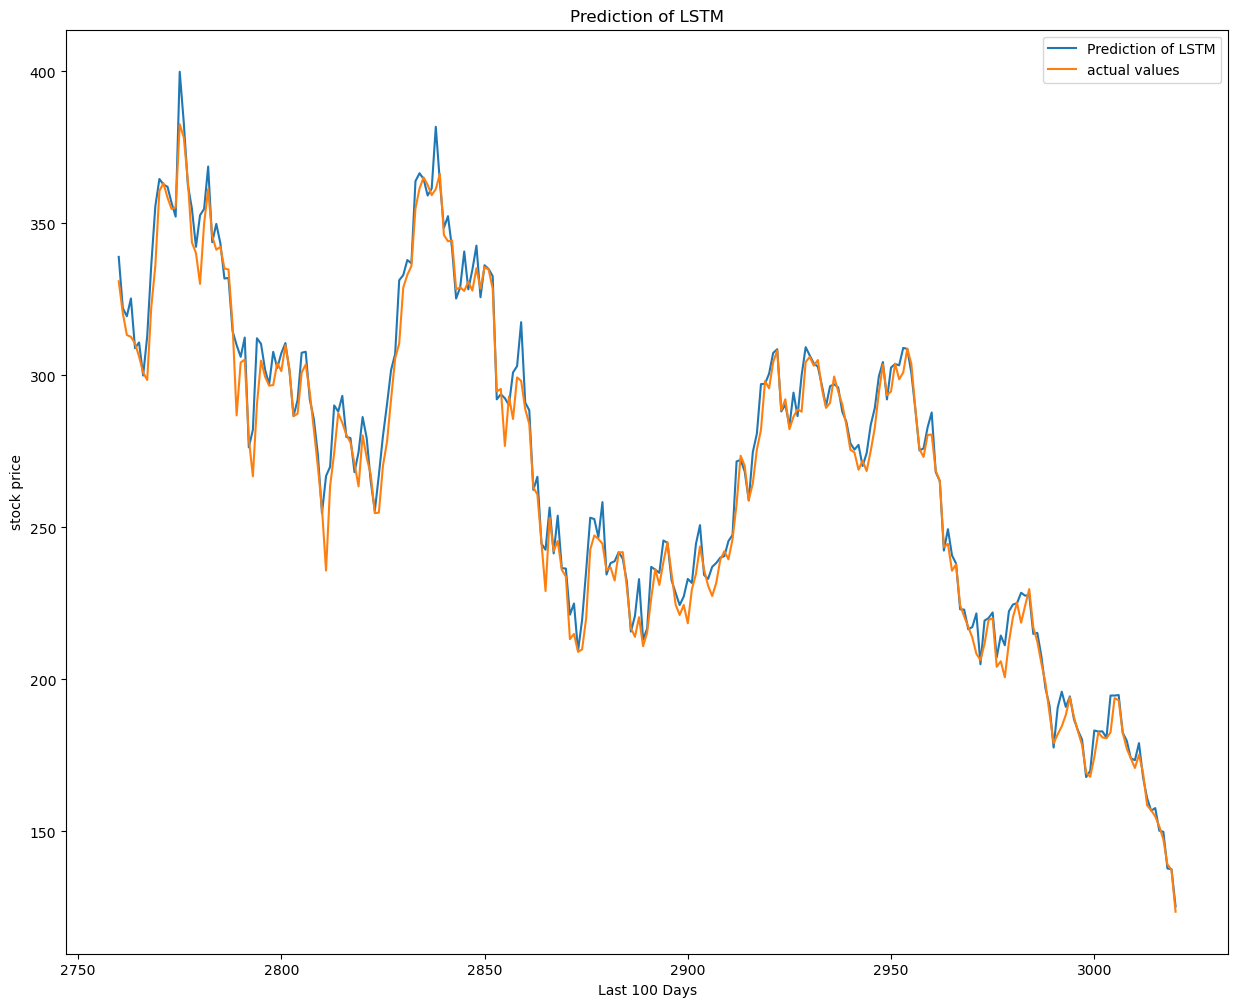

In [22]:
# show Prediction of LSTM compared with actual values
plt.rcParams['figure.figsize'] = (15,12)
plt.plot(df_final['Close'], label='Prediction of LSTM')
plt.plot(df_final['close_pred'], label='actual values')
plt.legend(loc ="upper right")
plt.title('Prediction of LSTM')
plt.xlabel('Last 100 Days')
plt.ylabel('stock price')
plt.show()